In [53]:
import pandas as pd
from operator import itemgetter
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df_sum=pd.DataFrame(columns=['Date','Title'])
for i in range(1,11):
    path='/Users/Jingsi/Desktop/A_Wiley/Blog_parse/sa/%d.json'%i
    df=pd.read_json(path)
    print(len(df))
#     df_sum=df.merge(right=df_sum, how='outer', left_on='year',right_on='year')
    df_sum=df.append(df_sum)
# df_sum.head()
df_sum.describe()

5
10
8
603
38
9
8
3
2
40


,Date,Title
count,726,726
unique,616,591
top,"October 1, 1986 — Jonathan J. Rosen and Robert...",Books
freq,10,14


In [10]:
df_sum=df_sum.drop_duplicates(keep='first')
df_sum.describe()

,Date,Title
count,620,620
unique,616,591
top,"September 5, 1863",Books
freq,2,12


In [67]:
year_dic=[]
for i in range(1,11):
    path='/Users/Jingsi/Desktop/A_Wiley/Blog_parse/sa/%d.json'%i
    df_try=pd.read_json(path)
    temp={}
    for item in df_try['Date']:
        date=item.split("—")[0].split(",")
        if len(date)==2:
            year=date[1].strip()
            if str(year) in temp:
                temp[str(year)]+=1
            else:
                temp[str(year)]=1
    year_dic.append(temp)
# print(len(year_dict))
print(year_dic[3])

{'2008': 16, '2006': 4, '2012': 24, '1997': 12, '2011': 16, '2015': 17, '2010': 13, '2009': 9, '2003': 3, '2013': 18, '2014': 26, '2016': 13, '2018': 10, '1986': 13, '1999': 5, '2007': 5, '2017': 10, '2001': 2, '1988': 4, '1991': 4, '1994': 3, '1992': 5, '2000': 2, '1886': 5, '1995': 3, '1977': 5, '1974': 5, '2004': 1, '2002': 1, '1998': 5, '1958': 3, '1972': 2, '1966': 3, '1979': 6, '1978': 7, '1959': 2, '1953': 4, '1910': 4, '1908': 3, '1918': 3, '1955': 2, '1906': 1, '1956': 8, '1900': 2, '1899': 4, '1878': 4, '1917': 4, '1890': 3, '1957': 4, '1915': 8, '1873': 2, '1884': 3, '1881': 4, '1982': 3, '1865': 6, '1931': 5, '1954': 2, '1858': 1, '1981': 4, '1887': 1, '1937': 3, '1996': 2, '1885': 5, '1984': 5, '1947': 1, '1975': 5, '1987': 7, '1921': 5, '1892': 5, '1883': 3, '1971': 4, '1961': 3, '1985': 6, '1951': 4, '1946': 6, '1893': 2, '1894': 3, '1911': 4, '1903': 1, '1904': 3, '1980': 4, '1914': 2, '1967': 2, '1879': 3, '1929': 5, '2005': 2, '1928': 3, '1973': 1, '1945': 5, '1965': 

In [68]:
sortedvalue = sorted(year_dic[3].items(), key=itemgetter(0), reverse=False)
sortedvalue 

[('1858', 1),
 ('1862', 1),
 ('1863', 3),
 ('1864', 1),
 ('1865', 6),
 ('1867', 1),
 ('1868', 1),
 ('1869', 1),
 ('1870', 1),
 ('1871', 2),
 ('1872', 3),
 ('1873', 2),
 ('1875', 3),
 ('1878', 4),
 ('1879', 3),
 ('1880', 2),
 ('1881', 4),
 ('1882', 2),
 ('1883', 3),
 ('1884', 3),
 ('1885', 5),
 ('1886', 5),
 ('1887', 1),
 ('1888', 1),
 ('1889', 4),
 ('1890', 3),
 ('1891', 3),
 ('1892', 5),
 ('1893', 2),
 ('1894', 3),
 ('1895', 3),
 ('1896', 1),
 ('1897', 2),
 ('1899', 4),
 ('1900', 2),
 ('1902', 1),
 ('1903', 1),
 ('1904', 3),
 ('1905', 1),
 ('1906', 1),
 ('1907', 5),
 ('1908', 3),
 ('1910', 4),
 ('1911', 4),
 ('1912', 4),
 ('1913', 4),
 ('1914', 2),
 ('1915', 8),
 ('1916', 4),
 ('1917', 4),
 ('1918', 3),
 ('1919', 3),
 ('1920', 5),
 ('1921', 5),
 ('1924', 4),
 ('1925', 1),
 ('1926', 2),
 ('1927', 4),
 ('1928', 3),
 ('1929', 5),
 ('1930', 5),
 ('1931', 5),
 ('1932', 3),
 ('1933', 2),
 ('1934', 3),
 ('1935', 2),
 ('1936', 3),
 ('1937', 3),
 ('1938', 4),
 ('1939', 4),
 ('1940', 1),
 ('194

In [75]:
import csv
for i in range(0,10):
    topic_dic_sort = sorted(year_dic[i].items(), key=itemgetter(0), reverse=False)
    print(topic_dic_sort)
#     with open('/Users/Jingsi/Desktop/A_Wiley/Topic_trend/micro_reg/topic%d.csv'%i,'w') as out:
    with open('/Users/Jingsi/Desktop/A_Wiley/Blog_parse/sa/count/%d.csv'%i,'w') as out:
        csv_out=csv.writer(out)
        csv_out.writerow(['year','number'])
        for row in topic_dic_sort:
            csv_out.writerow(row)

[('1986', 1), ('1987', 2), ('1999', 1), ('2006', 1)]
[('1970', 1), ('1979', 1), ('1986', 1), ('1990', 1), ('1991', 1), ('1992', 1), ('2006', 2), ('2007', 1), ('2008', 1)]
[('1986', 1), ('1991', 1), ('1999', 1), ('2006', 2), ('2012', 2), ('2013', 1)]
[('1858', 1), ('1862', 1), ('1863', 3), ('1864', 1), ('1865', 6), ('1867', 1), ('1868', 1), ('1869', 1), ('1870', 1), ('1871', 2), ('1872', 3), ('1873', 2), ('1875', 3), ('1878', 4), ('1879', 3), ('1880', 2), ('1881', 4), ('1882', 2), ('1883', 3), ('1884', 3), ('1885', 5), ('1886', 5), ('1887', 1), ('1888', 1), ('1889', 4), ('1890', 3), ('1891', 3), ('1892', 5), ('1893', 2), ('1894', 3), ('1895', 3), ('1896', 1), ('1897', 2), ('1899', 4), ('1900', 2), ('1902', 1), ('1903', 1), ('1904', 3), ('1905', 1), ('1906', 1), ('1907', 5), ('1908', 3), ('1910', 4), ('1911', 4), ('1912', 4), ('1913', 4), ('1914', 2), ('1915', 8), ('1916', 4), ('1917', 4), ('1918', 3), ('1919', 3), ('1920', 5), ('1921', 5), ('1924', 4), ('1925', 1), ('1926', 2), ('1927',

In [1]:
df_sum=pd.DataFrame(columns=['year','number'])
for i in range(0, 10):
#     path='/Users/Jingsi/Desktop/A_Wiley/Topic_trend/micro_reg/topic%d.csv'%i
    path='/Users/Jingsi/Desktop/A_Wiley/Blog_parse/sa/count/%d.csv'%i
    df=pd.read_csv(path)
    df=df.loc[df['year'] >= 2000]
    print(df)
    df_sum=df.merge(right=df_sum, how='outer', left_on='year',right_on='year')
# print(df_sum)

NameError: name 'pd' is not defined

In [81]:
column_name=['year','bone','chitosan','hydrogel','nanoparticles','regeneration','polymer','tissue engineering','scaffold','adhesion','microstructure','None']
df_sum.columns = column_name

In [97]:
df_res=df_sum.drop(['None'],axis=1)
df_res=df_res.groupby('year',as_index=False).mean()
df_res

,year,bone,chitosan,hydrogel,nanoparticles,regeneration,polymer,tissue engineering,scaffold,adhesion,microstructure
0,2000,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
1,2001,2.0,NaN,NaN,NaN,NaN,1.0,2,NaN,NaN,NaN
2,2002,1.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
3,2003,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
4,2004,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
5,2005,1.0,NaN,NaN,1.0,NaN,1.0,2,NaN,NaN,NaN
6,2006,2.0,1.0,1.0,1.0,2.0,2.0,4,2.0,2.0,1.0
7,2007,1.0,NaN,NaN,NaN,NaN,3.0,5,NaN,1.0,NaN
8,2008,NaN,NaN,NaN,NaN,NaN,2.0,16,NaN,1.0,NaN
9,2009,1.0,NaN,NaN,NaN,NaN,1.0,9,NaN,NaN,NaN


In [101]:
# df_res=df_res.fillna(df_res.mean(),inplace=True)
df_res.fillna(0, inplace=True)
df_res.to_csv('/Users/Jingsi/Desktop/A_Wiley/for_tableau/sa_topics.csv')

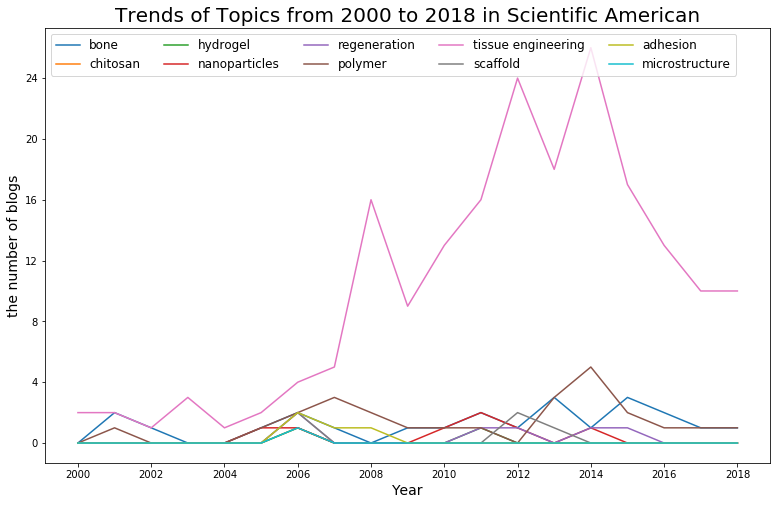

In [107]:
column_name_0=['bone','chitosan','hydrogel','nanoparticles','regeneration','polymer','tissue engineering','scaffold','adhesion','microstructure']
plt.figure(figsize=(13,8))

for column in df_res.drop('year', axis=1):
    plt.plot(df_res['year'], df_res[column], label=column)
plt.legend(column_name_0, ncol=5,loc=2,prop={'size': 12})

plt.xlabel('Year',fontsize=14)
plt.ylabel('the number of blogs', fontsize=14)
plt.xticks(np.arange(2000, 2020, 2))
plt.yticks(np.arange(0, 28, 4))

plt.title('Trends of Topics from 2000 to 2018 in Scientific American',fontsize=20)
plt.savefig('Trends of Topics from 2000 to 2018 on Scientific American.png')